In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from sklearn.metrics import mean_absolute_error

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [3]:
from features.Data_Transformation import LowPassFilter

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
# Plot Settings

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2

In [6]:
df = pd.read_pickle("../data/interim/01_resampled_data.pkl")
df = df[df["label"] != "rest"]
df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [8]:
acc_r = df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2
gyro_r = df["gyro_x"]**2 + df["gyro_y"]**2 + df["gyro_z"]**2
df["acc_r"] = np.sqrt(acc_r)
df["gyro_r"] = np.sqrt(gyro_r)

In [9]:
gyro_r

epoch (ms)
2019-01-11 15:08:05.200    10.404654
2019-01-11 15:08:05.400     8.336328
2019-01-11 15:08:05.600     8.624326
2019-01-11 15:08:05.800    89.747245
2019-01-11 15:08:06.000    21.377539
                             ...    
2019-01-20 17:33:27.000    33.691343
2019-01-20 17:33:27.200    13.042268
2019-01-20 17:33:27.400    34.449584
2019-01-20 17:33:27.600     1.378254
2019-01-20 17:33:27.800    18.350756
Length: 7899, dtype: float64

In [10]:
bench_df = df[df["label"] == "bench"]
squat_df = df[df["label"] == "squat"]
row_df = df[df["label"] == "row"]
ohp_df = df[df["label"] == "ohp"]
dead_df = df[df["label"] == "dead"]

In [12]:
ohp_df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,acc_r,gyro_r
epoch (ms),,,,,,,,,,,,
2019-01-11 15:38:55.000,-0.062500,0.901000,0.047000,0.4390,-6.5000,-0.0854,A,ohp,heavy,9,0.904387,6.515368
2019-01-11 15:38:55.200,-0.080667,1.080667,0.060333,5.5976,-3.2196,-1.4266,A,ohp,heavy,9,1.085351,6.613179
2019-01-11 15:38:55.400,-0.137500,1.314000,0.024000,20.8534,7.7562,-44.1340,A,ohp,heavy,9,1.321393,49.425023
2019-01-11 15:38:55.600,-0.234667,0.910333,-0.007000,17.7684,11.4880,-35.0002,A,ohp,heavy,9,0.940119,40.898706
2019-01-11 15:38:55.800,-0.337000,0.861000,-0.095500,2.3778,2.2682,-4.6220,A,ohp,heavy,9,0.929522,5.671115
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15 13:55:56.600,-0.218667,1.206667,-0.129333,-32.1462,-11.7194,35.2438,E,ohp,heavy,78,1.233121,49.120749
2019-01-15 13:55:56.800,-0.095500,1.135500,-0.097000,27.0488,-2.8536,-0.0976,E,ohp,heavy,78,1.143630,27.199083
2019-01-15 13:55:57.000,-0.122667,0.944000,-0.114000,-15.6584,-3.2318,-4.2560,E,ohp,heavy,78,0.958738,16.545197


### Data Visualization to identify patterns

<Axes: xlabel='epoch (ms)'>

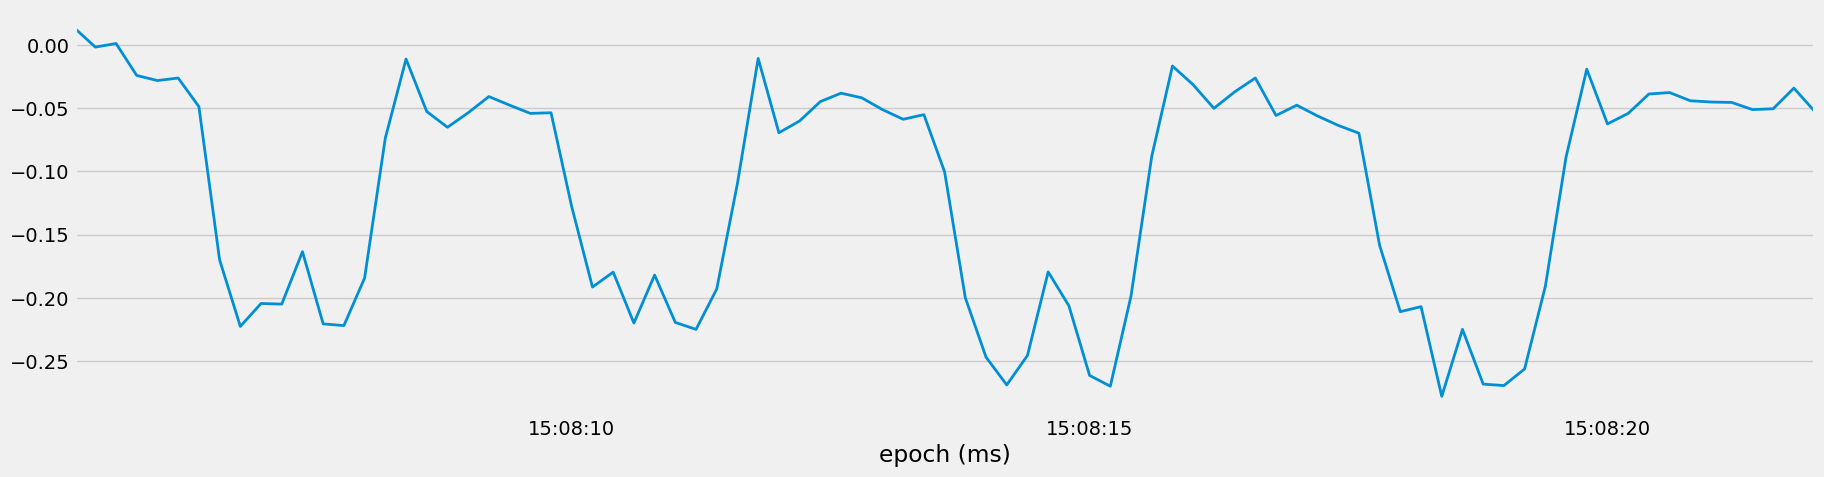

In [14]:
plot_df = bench_df
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_x"].plot()

<Axes: xlabel='epoch (ms)'>

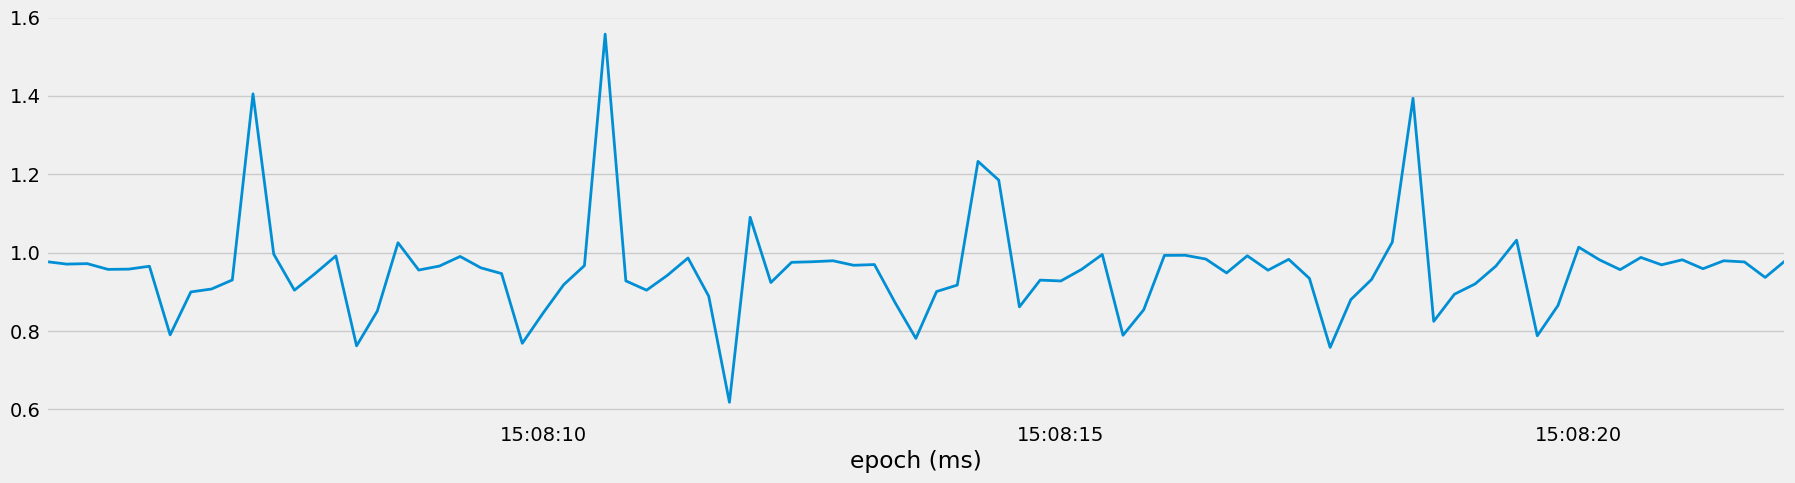

In [15]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_y"].plot()

<Axes: xlabel='epoch (ms)'>

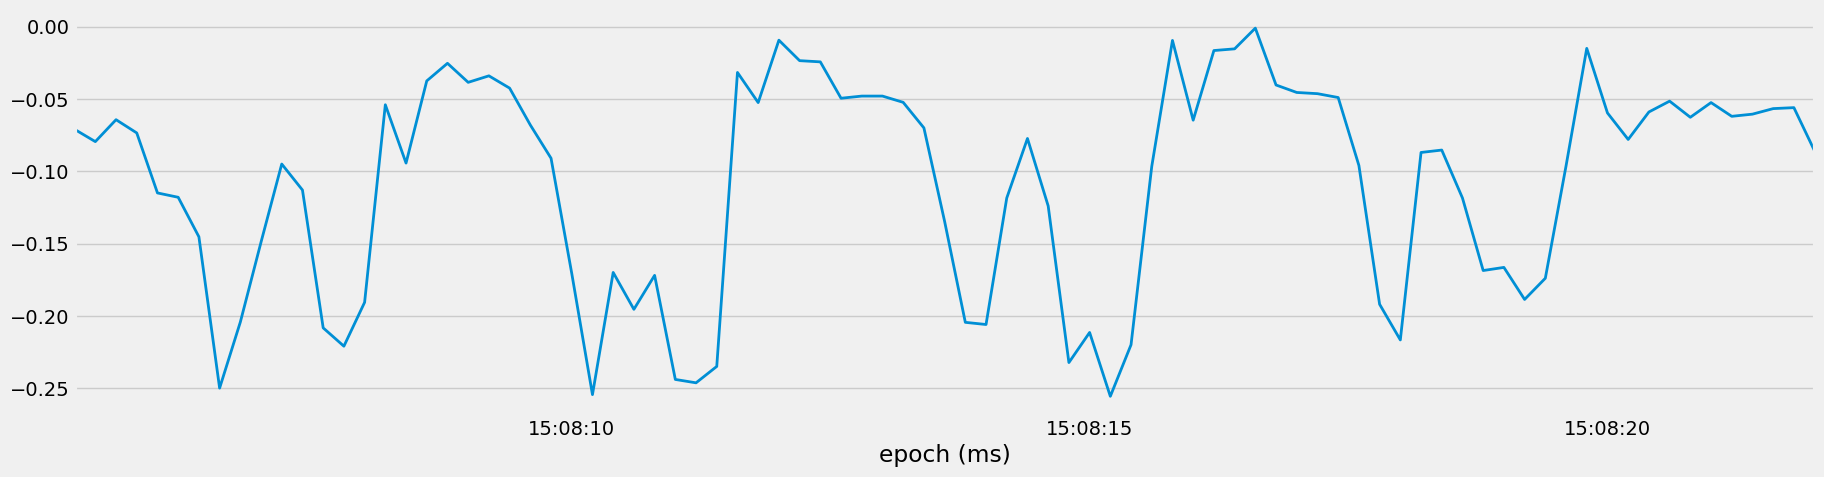

In [16]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_z"].plot()

<Axes: xlabel='epoch (ms)'>

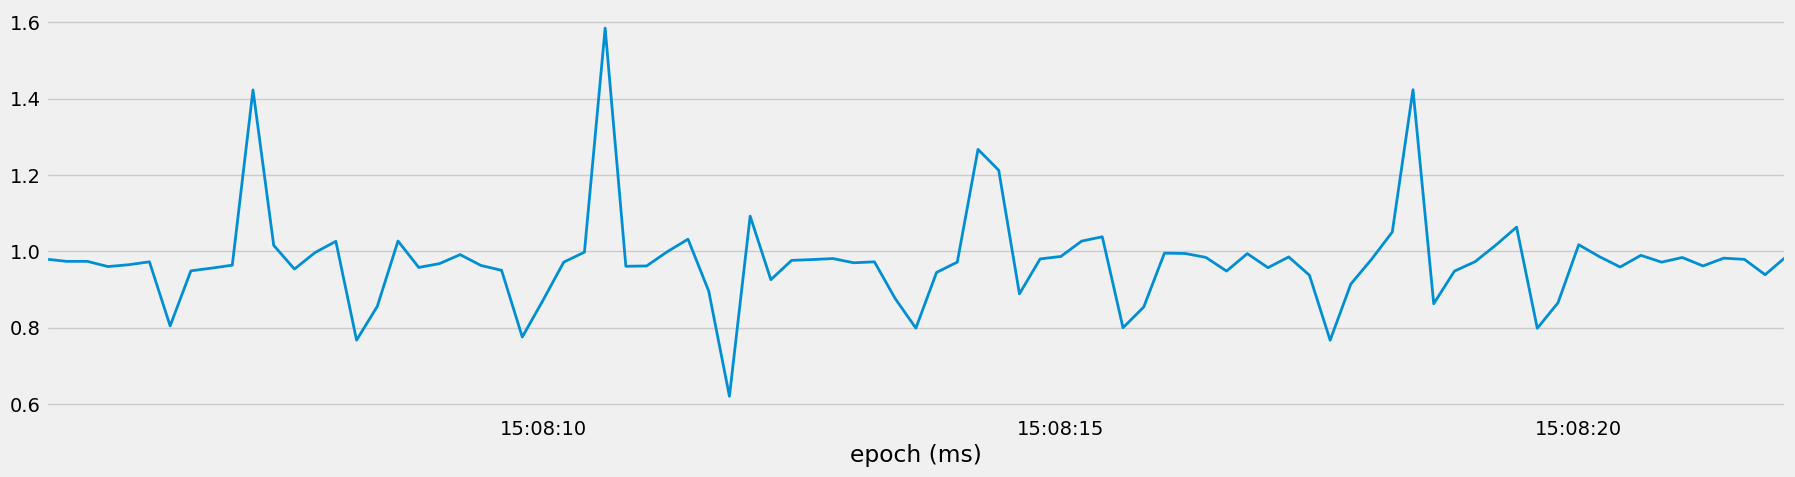

In [17]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_r"].plot()

### Using Low Pass Filter

In [18]:
# Sampling frequency

fs = 1000/200
low_pass = LowPassFilter()

In [25]:
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[0]]
squat_set = squat_df[squat_df["set"] == squat_df["set"].unique()[0]]
row_set = row_df[row_df["set"] == row_df["set"].unique()[0]]
ohp_set = ohp_df[ohp_df["set"] == ohp_df["set"].unique()[0]]
dead_set = dead_df[dead_df["set"] == dead_df["set"].unique()[0]]

In [29]:
dead_set

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,acc_r,gyro_r
epoch (ms),,,,,,,,,,,,
2019-01-11 16:24:24.800,0.056500,-1.027000,-0.165500,3.231667,-2.6830,2.418667,A,dead,medium,6,1.041783,4.846866
2019-01-11 16:24:25.000,0.073333,-1.025000,-0.155333,12.853600,-30.9024,4.487800,A,dead,medium,6,1.039294,33.768531
2019-01-11 16:24:25.200,0.059000,-1.022000,-0.125500,2.073200,-1.2316,3.170800,A,dead,medium,6,1.031366,3.983588
2019-01-11 16:24:25.400,0.030667,-1.031667,-0.114667,-0.329600,3.1098,1.817000,A,dead,medium,6,1.038472,3.616764
2019-01-11 16:24:25.600,0.046500,-1.025500,-0.124500,-0.975600,9.7682,-2.219400,A,dead,medium,6,1.034076,10.064555
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 16:24:54.800,0.039000,-1.337500,-0.105500,-19.000000,18.5000,-3.829400,A,dead,medium,6,1.342221,26.793923
2019-01-11 16:24:55.000,0.081667,-1.006000,-0.094667,-15.719600,24.2926,13.695200,A,dead,medium,6,1.013739,32.012415
2019-01-11 16:24:55.200,0.033500,-1.052000,-0.185000,-0.060800,-4.8294,7.317200,A,dead,medium,6,1.068668,8.767452


<Axes: xlabel='epoch (ms)'>

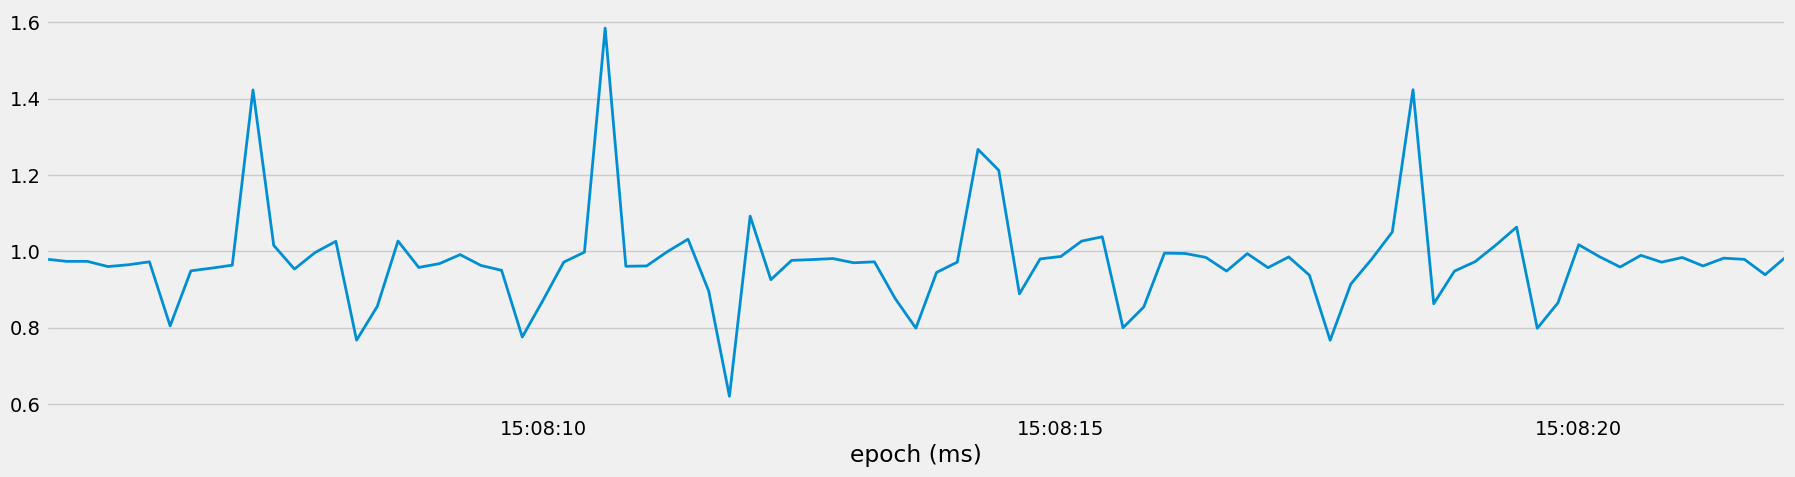

In [30]:
bench_set["acc_r"].plot()

In [41]:
column = "acc_r"
low_pass_df = low_pass.low_pass_filter(bench_set, col = column, sampling_frequency=fs, cutoff_frequency=0.4, order=10)

<Axes: xlabel='epoch (ms)'>

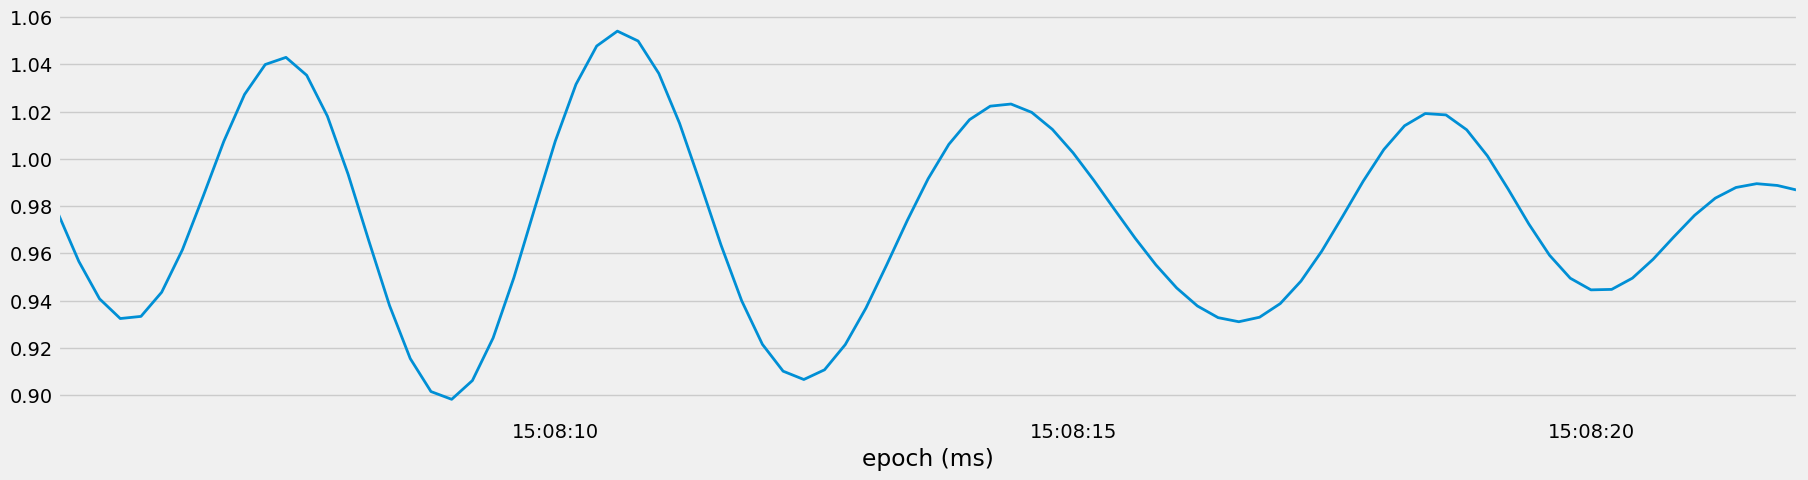

In [42]:
low_pass_df[column + "_lowpass"].plot()

### Creating Count repetition function

In [43]:
def count_reps(dataset, cutoff=0.4, order=10, column="acc_r"):
    data = low_pass.low_pass_filter(dataset, col=column, sampling_frequency=fs, cutoff_frequency=cutoff, order=order)
    indexes = argrelextrema(data[column + "_lowpass"].values, np.greater)
    peaks = data.iloc[indexes]
    
    # Visualizing the peak more properly
    fig, ax = plt.subplots()
    plt.plot(dataset[f"{column}_lowpass"])
    plt.plot(peaks[f"{column}_lowpass"], "o", color="red")
    ax.set_ylabel(f"{column}_lowpass")
    exercise = dataset["label"].iloc[0].title()
    category = dataset["category"].iloc[0].title()
    plt.title(f"{category} {exercise} : {len(peaks)} Reps")
    plt.show()
    
    return len(peaks)

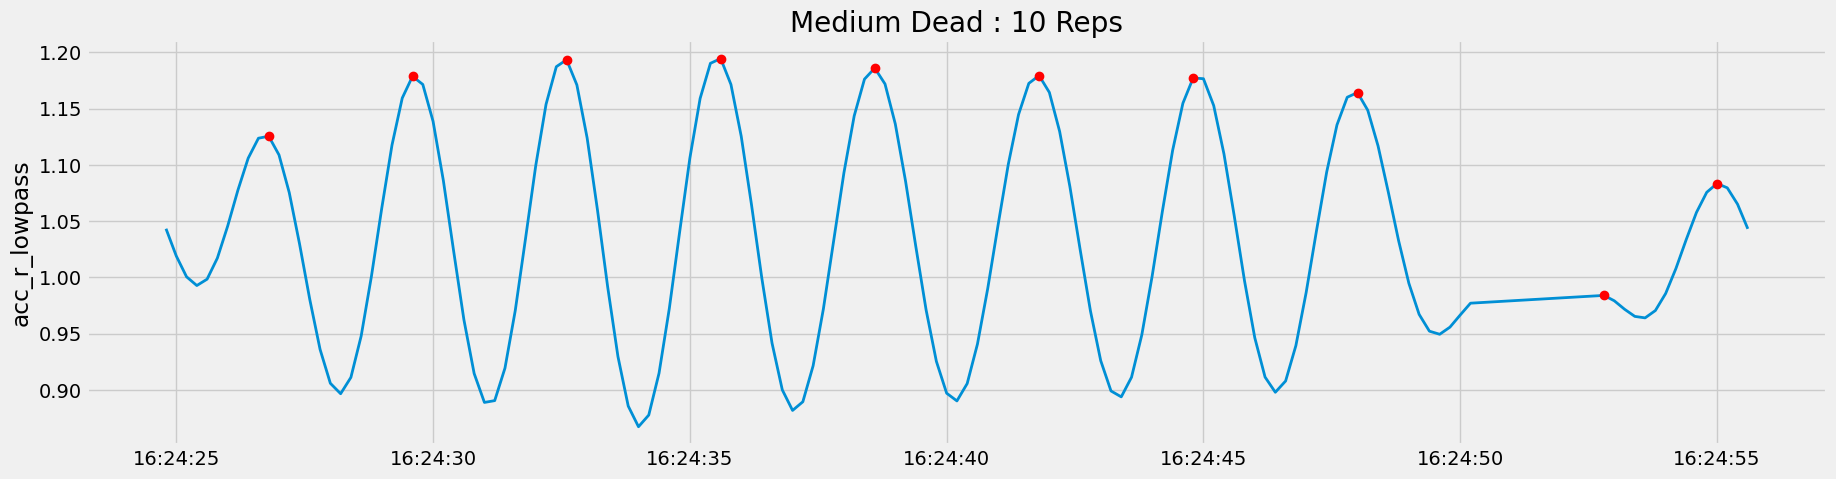

10

In [48]:
count_reps(dead_set)